In [1]:
import time
import datetime
from epics import caget
import matplotlib.pyplot as plt

from image import Image
from beam_io import saveimage

from IPython.display import clear_output

In [4]:
caget("OTRS:IN20:571:ROI_XNP"), caget("OTRS:IN20:571:ROI_YNP")

(334, 270)

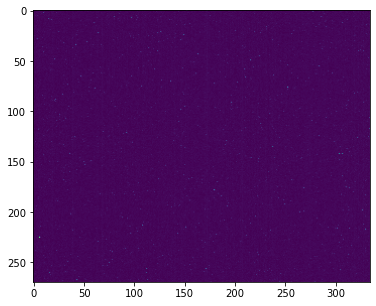

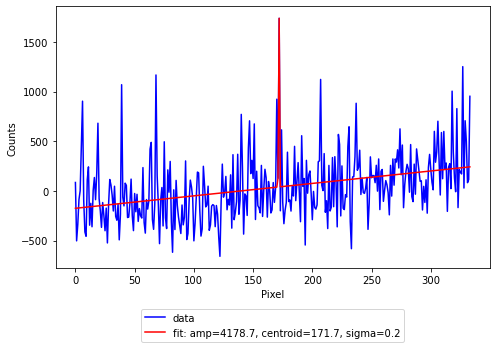

KeyboardInterrupt: 

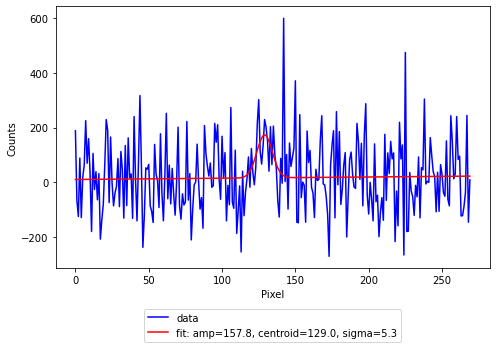

In [3]:
while True:
    im = caget("OTRS:IN20:571:IMAGE")
    beam_image = Image(im, 270, 334, bg_image = None) #ROI found from EPICS PVs (they did not change)
    beam_image.reshape_im()
    plt.figure(figsize = (15,5))
    plt.imshow(beam_image.proc_image)
    beam_image.get_im_projection();
    beamsizes = beam_image.get_sizes(show_plots=True)
    saveimage(im, 270, 334, beamsizes)
    plt.close()

    time.sleep(3)
    clear_output(wait=True)